In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import SLIP

In [3]:
%cd ..
from dev.retina import Retina, RetinaWhiten

/home/dauce/Recherche/stages/Julia Gachot 2019/POLO


In [4]:
#args = init(filename='../data/2019-07-23')
from easydict import EasyDict
args = EasyDict({'w': 28,
 'minibatch_size': 10,
 'train_batch_size': 1000,
 'test_batch_size': 126,
 'noise_batch_size': 1000,
 'mean': 0.1307,
 'std': 0.3081,
 'N_pic': 1718,
 'N_X': 1718,
 'N_Y': 2444,
 'N_X2': 98,
 'N_Y2': 140,
 'offset_std': 30,
 'offset_max': 34,
 'noise': 0.75,
 'contrast': 0.7,
 'sf_0': 0.1,
 'B_sf': 0.1,
 'N_theta': 6,
 'N_azimuth': 72,
 'N_eccentricity': 48,
 'N_phase': 2,
 'rho': 1.41,
 'bias_deconv': True,
 'p_dropout': 0.5,
 'dim1': 1000,
 'dim2': 1000,
 'lr': 0.005,
 'do_adam': 'adam',
 'bn1_bn_momentum': 0,
 'bn2_bn_momentum': 0,
 'momentum': 0,
 'epochs': 60,
 'num_processes': 1,
 'no_cuda': True,
 'log_interval': 20,
 'verbose': 1,
 'filename': '../data/2019-07-23',
 'seed': 2019,
 'N_cv': 10,
 'do_compute': True,
 'save_model': True,
 'zoomW': 300})

In [5]:
pe = {'N_image': 100, 'seed': None, 'N_X': 512, 'N_Y': 512, 'noise':
            0.1, 'do_mask': True, 'mask_exponent': 3.0, 'do_whitening': True,
              'white_name_database': 'kodakdb', 'white_n_learning': 0, 'white_N':
                  0.07, 'white_N_0': 0.0, 'white_f_0': 0.4, 'white_alpha': 1.4,
              'white_steepness': 4.0, 'white_recompute': False, 'base_levels':
                  1.618, 'n_theta': 24, 'B_sf': 0.4, 'B_theta': 0.17453277777777776,
              'use_cache': True, 'figpath': 'results', 'edgefigpath':
                  'results/edges', 'matpath': 'cache_dir', 'edgematpath':
                  'cache_dir/edges', 'datapath': 'database/', 'ext': '.pdf', 'figsize':
                  14.0, 'formats': ['pdf', 'png', 'jpg'], 'dpi': 450, 'verbose': 0}

In [6]:
print('N_X :', args.N_X)
print('N_Y :', args.N_Y)
print('N_theta :', args.N_theta)
print('N_azimuth :', args.N_azimuth)
print('N_eccentricity :', args.N_eccentricity)
print('N_phase :', args.N_phase)

N_X : 1718
N_Y : 2444
N_theta : 6
N_azimuth : 72
N_eccentricity : 48
N_phase : 2


In [7]:
from PIL import Image
impath = 'data/i05june05_static_street_boston_p1010764.jpeg'
im = Image.open(impath)

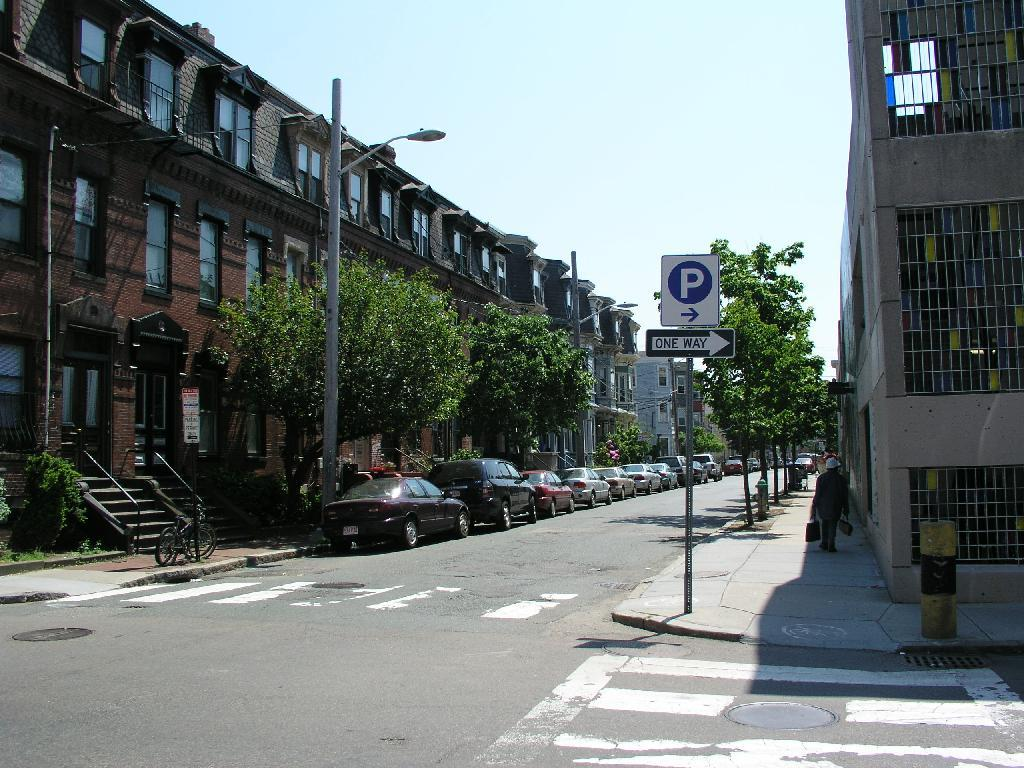

In [8]:
im

In [9]:
im_color_npy = np.asarray(im)

In [10]:
im_bw = im.convert("L")

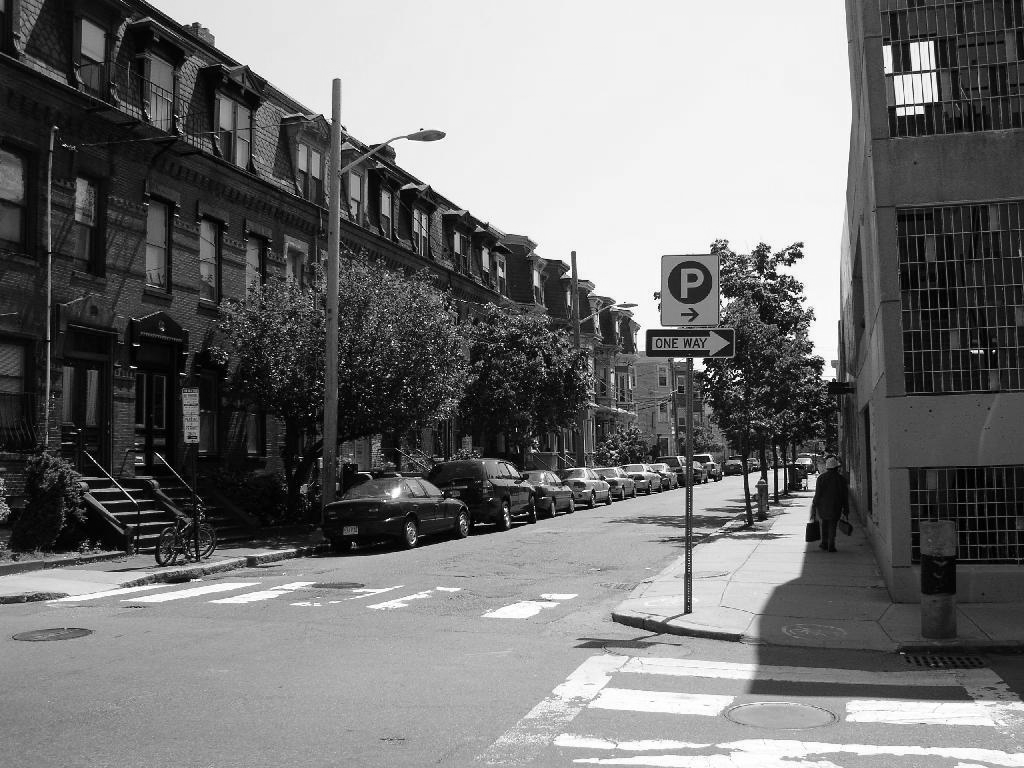

In [11]:
im_bw

In [12]:
im_npy = np.asarray(im_bw)

In [13]:
im_npy

array([[116, 115,  98, ...,  31,  50,  91],
       [116, 115,  99, ...,  37,  53,  95],
       [115, 113,  97, ...,  42,  50,  95],
       ...,
       [140, 135, 130, ..., 247, 250, 252],
       [133, 130, 128, ..., 179, 180, 180],
       [130, 131, 132, ..., 174, 176, 177]], dtype=uint8)

In [14]:
args.N_X, args.N_Y = im_npy.shape
args_N_pic = args.N_Y

In [15]:
whiten_transform = RetinaWhiten(args)
im_whiten = whiten_transform(im_npy)

In [16]:
args.N_X, args.N_Y = 768, 1024
args_N_pic = args.N_Y

In [17]:
retina = Retina(args)

Creation du dictionnaire de filtres en cours...
Dico cree
len finale 48 6 2 16


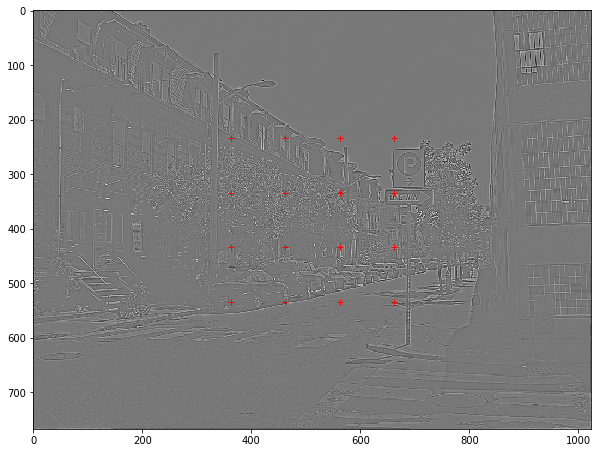

In [18]:
plt.figure(figsize=(10,10))
plt.imshow(im_whiten, cmap='gray')
grid = np.array(((-150, -150), (-150, -50), (-150, 50), (-150, 150),
                 (-50, -150), (-50, -50), (-50, 50), (-50, 150),
                 (50, -150), (50, -50), (50, 50), (50, 150),
                 (150, -150), (150, -50), (150, 50), (150, 150))) + (args.N_X//2, args.N_Y//2)
for loc in grid:
    plt.plot(loc[1], loc[0], 'r+')

In [19]:
grid

array([[234, 362],
       [234, 462],
       [234, 562],
       [234, 662],
       [334, 362],
       [334, 462],
       [334, 562],
       [334, 662],
       [434, 362],
       [434, 462],
       [434, 562],
       [434, 662],
       [534, 362],
       [534, 462],
       [534, 562],
       [534, 662]])

In [20]:
i = 13
retina_features = retina.transform(im_whiten, loc = grid[i])

In [21]:
img_trans = retina.inverse_transform(retina_features)

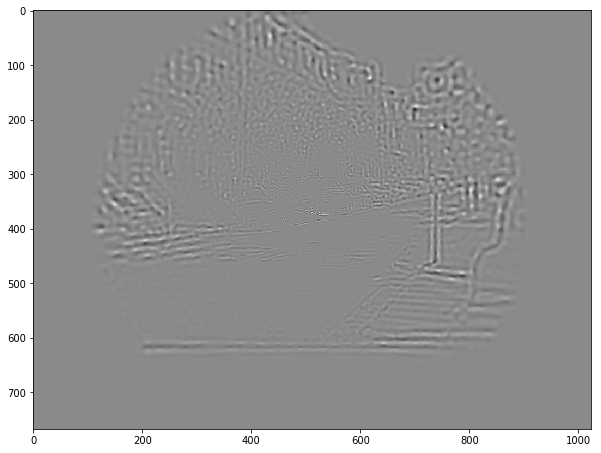

In [22]:
plt.figure(figsize=(10,10))
plt.imshow(img_trans, cmap='gray')

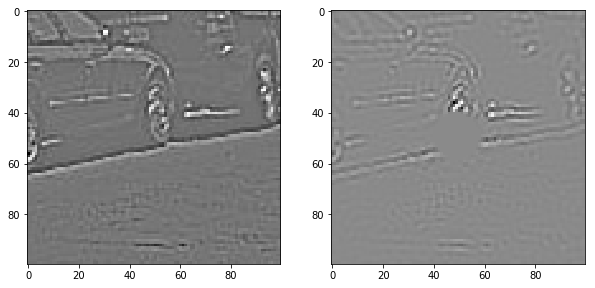

In [23]:
plt.figure(figsize=(10,20))
plt.subplot(121)
plt.imshow(im_whiten[grid[i][0]-50:grid[i][0] + 50, grid[i][1]-50:grid[i][1] + 50], cmap='gray')
plt.subplot(122)
plt.imshow(img_trans[args.N_X//2-50:args.N_X//2+50, args.N_Y//2-50:args.N_Y//2 + 50], cmap='gray')

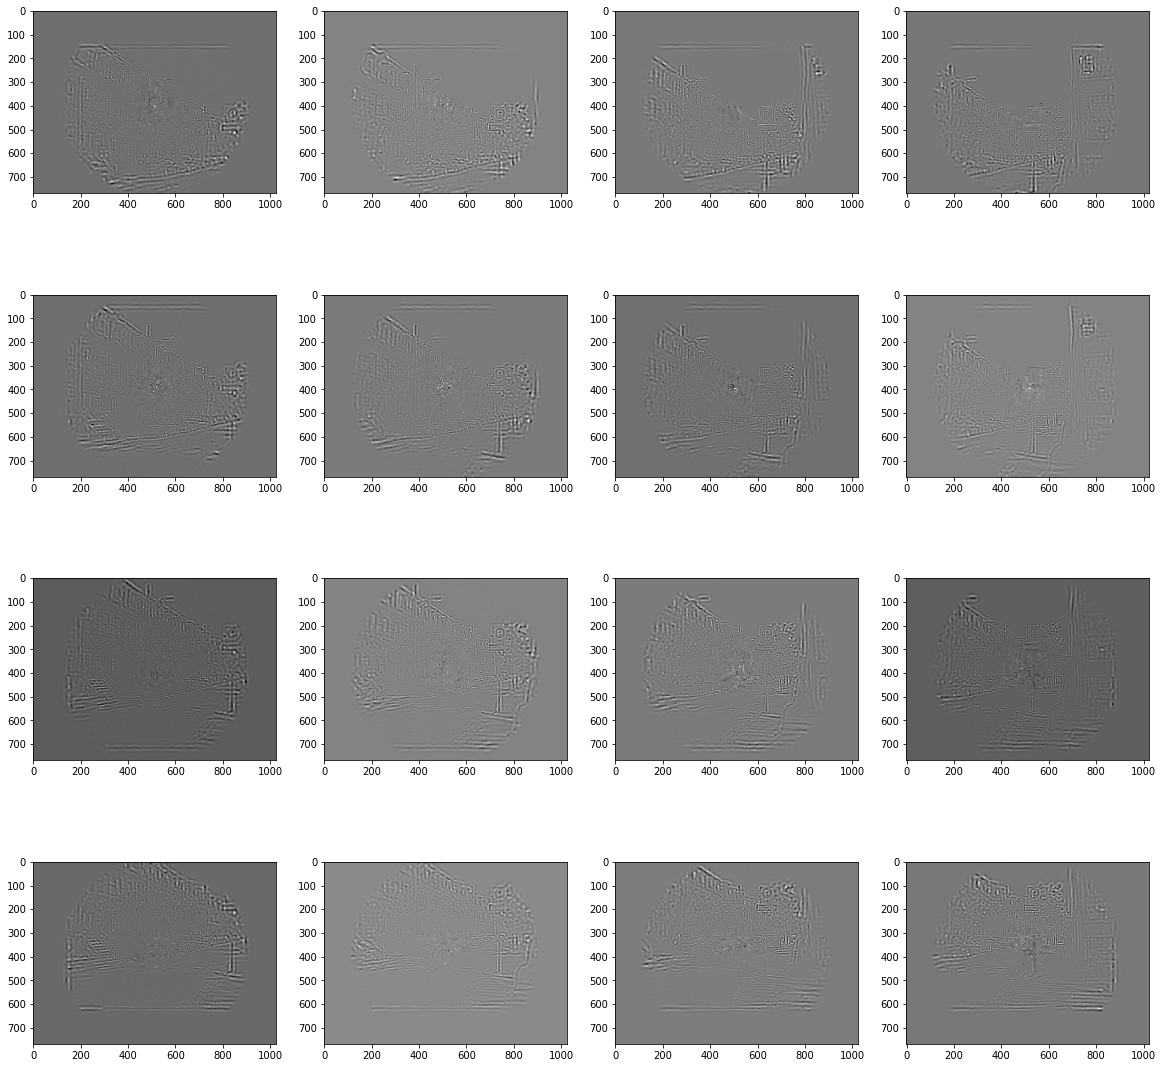

In [24]:
plt.figure(figsize=(20,20))
for i in range(grid.shape[0]):
    retina_features = retina.transform(im_whiten, loc = grid[i])
    img_trans = retina.inverse_transform(retina_features)
    plt.subplot(4,4,i+1)
    plt.imshow(img_trans, cmap='gray')
    

In [25]:
im_test = img_trans[args.N_X//2-50:args.N_X//2 + 50, args.N_Y//2-50:args.N_Y//2 + 50]
whit.set_size((100, 100))
img_rec = whit.dewhitening(im_test)
plt.imshow(img_rec, cmap='gray')

NameError: name 'whit' is not defined

In [ ]:
from LogGabor import LogGabor

N_theta=6
rho = 1.41
ecc_max = .8  # self.args.ecc_max
sf_0_r = 0.03  # self.args.sf_0_r
sf_0_max = 0.45
B_theta = np.pi / N_theta / 2  # self.args.B_theta
B_sf = .4

pe = {'N_image': 100, 'seed': None, 'N_X': 512, 'N_Y': 512, 'noise': 
0.1, 'do_mask': True, 'mask_exponent': 3.0, 'do_whitening': True, 
'white_name_database': 'kodakdb', 'white_n_learning': 0, 'white_N': 
0.07, 'white_N_0': 0.0, 'white_f_0': 0.4, 'white_alpha': 1.4, 
'white_steepness': 4.0, 'white_recompute': False, 'base_levels': 
1.618, 'n_theta': 24, 'B_sf': 0.4, 'B_theta': 0.17453277777777776, 
'use_cache': True, 'figpath': 'results', 'edgefigpath': 
'results/edges', 'matpath': 'cache_dir', 'edgematpath': 
'cache_dir/edges', 'datapath': 'database/', 'ext': '.pdf', 'figsize': 
14.0, 'formats': ['pdf', 'png', 'jpg'], 'dpi': 450, 'verbose': 0}


lg = LogGabor(pe=pe)

i_eccentricity = 15
N_eccentricity = 48
ecc = ecc_max * (1 / rho) ** (N_eccentricity - i_eccentricity)

i_theta = 5
N_theta = 6
theta_ref = i_theta * np.pi / N_theta
sf_0 = 0.5 * sf_0_r / ecc
sf_0 = np.min((sf_0, sf_0_max))

N = 200
dimension_filtre = int( N /2 * ecc)
#if dimension_filtre % 2 == 1:
#    dimension_filtre += 1
#dimension_filtre = 100


# print("dimension_filtre", dimension_filtre)
lg.set_size((dimension_filtre, dimension_filtre))

i_phase = 1
phase = i_phase * np.pi / 2

x = dimension_filtre // 2

y = dimension_filtre // 2

params = {'sf_0': sf_0,
           'B_sf': B_sf,
           'theta': theta_ref,
           'B_theta': B_theta}

filter = lg.normalize(lg.invert(lg.loggabor(x, y, **params) * np.exp(-1j * phase)))

In [ ]:
plt.imshow(filter)

In [ ]:
plt.plot(ecc_max * (1 / rho) ** (N_eccentricity - np.arange(N_eccentricity)))
plt.plot(ecc_max * (1 / 1.21) ** (N_eccentricity - np.arange(N_eccentricity)))
plt.plot(ecc_max * (1 / 1.08) ** (N_eccentricity - np.arange(N_eccentricity)))

In [ ]:
plt.plot(ecc_max * (1 / rho) ** (N_eccentricity - np.arange(10)))